In [77]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

In [17]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston = load_boston()

In [92]:
import rootpath
import sys
sys.path.append(rootpath.detect())
from testsuite.surrogates import GP

In [18]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [19]:
x = boston["data"]
y = boston["target"]

print(x.shape)
print(y.shape)

(506, 13)
(506,)


In [22]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.2)

In [23]:
data_dmatrix = xgb.DMatrix(data=x,label=y)

In [93]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.01,
                max_depth = 20, alpha = 10, n_estimators = 1000)

In [94]:
xg_reg.fit(x_tr, y_tr)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=20, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=10, ...)

In [121]:
xg_preds = xg_reg.predict(x_te)

In [122]:
## compare to random
sum((np.random.choice(y_tr, 102)-y_te)**2)/sum((xg_preds-y_te)**2)

15.816689783681568

In [123]:
gp = GP()
gp.update(x_tr, y_tr)

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 243.27446820503428
Optimization restart 2/10, f = 573.2511674146876
Optimization restart 3/10, f = 573.2511674146876
Optimization restart 4/10, f = 573.25116741469
Optimization restart 5/10, f = 243.2744682057384
Optimization restart 6/10, f = 573.2511674146876
Optimization restart 7/10, f = 573.2511674146878
Optimization restart 8/10, f = 243.27446820503434
Optimization restart 9/10, f = 573.2511674146876
Optimization restart 10/10, f = 573.2511674146876


In [124]:
gp_preds = gp.predict(x_te)[0][:, 0]
sum((np.random.choice(y_tr, 102)-y_te)**2)/sum((gp_preds-y_te)**2)

13.138244676680982

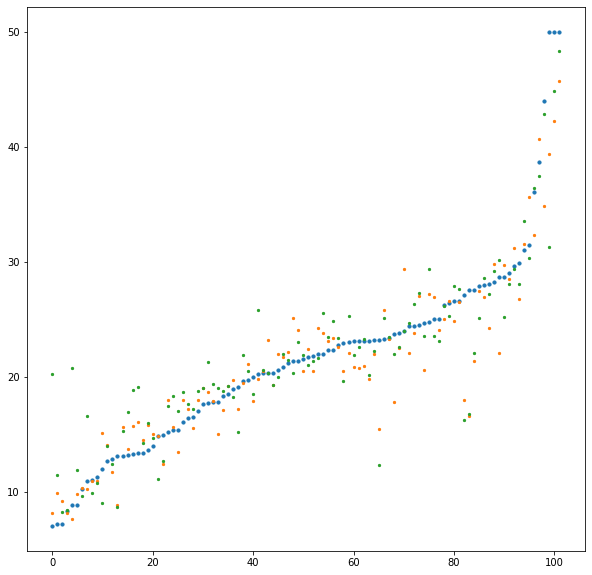

In [126]:
plt.figure(figsize=[10, 10])
plt.scatter(range(len(y_te)), y_te[np.argsort(y_te)], s=10)
plt.scatter(range(len(y_te)), xg_preds[np.argsort(y_te)], s=5)
plt.scatter(range(len(y_te)), gp_preds[np.argsort(y_te)], s=5)